In [6]:
!pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.52
    Uninstalling yfinance-0.2.52:
      Successfully uninstalled yfinance-0.2.52


In [1]:
#Correlation Matrix
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#Defining stock and downloading data from yfinance
stocks=['AAPL','MSFT', 'TSLA', 'GOLD']

In [14]:
stocks1=['TESLA','F']

In [17]:
stocks1_data=yf.download(stocks1, start= '01-01-2024', end='12-31-2024')['Close']
stocks1_data

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['TESLA']: YFTzMissingError('possibly delisted; no timezone found')


Ticker,TESLA
Date,


In [19]:
stocks_data=yf.download(stocks, start= '2024-01-01', end='2024-12-31')['Close']
stocks_data

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,GOLD,MSFT,TSLA
Date,,,,
2024-01-02,184.532074,17.566118,368.117279,248.419998
2024-01-03,183.150391,17.025774,367.849243,238.449997
2024-01-04,180.824356,17.045424,365.208984,237.929993
2024-01-05,180.098709,17.182966,365.020386,237.490005
2024-01-08,184.452560,17.379456,371.908936,240.449997
...,...,...,...,...
2024-12-23,254.989655,15.590000,435.250000,430.600006
2024-12-24,257.916443,15.710000,439.329987,462.279999
2024-12-26,258.735504,15.740000,438.109985,454.130005


In [20]:
returns_stock=stocks_data.pct_change()
returns_stock

Ticker,AAPL,GOLD,MSFT,TSLA
Date,,,,
2024-01-02,NaN,NaN,NaN,NaN
2024-01-03,-0.007487,-0.030761,-0.000728,-0.040134
2024-01-04,-0.012700,0.001154,-0.007178,-0.002181
2024-01-05,-0.004013,0.008069,-0.000516,-0.001849
2024-01-08,0.024175,0.011435,0.018872,0.012464
...,...,...,...,...
2024-12-23,0.003065,0.008409,-0.003092,0.022657
2024-12-24,0.011478,0.007697,0.009374,0.073572
2024-12-26,0.003176,0.001910,-0.002777,-0.017630


In [21]:
#calculating mean
mean_returns=returns_stock.mean()
mean_returns

,0
Ticker,
AAPL,0.001345
GOLD,-0.000286
MSFT,0.000653
TSLA,0.002862


In [22]:
#calculating Standard deviation
sd_returns=returns_stock.std()
sd_returns

,0
Ticker,
AAPL,0.014141
GOLD,0.021174
MSFT,0.012581
TSLA,0.040096


In [23]:
#correlation matrix:
correlation_matrix=returns_stock.corr()
correlation_matrix

Ticker,AAPL,GOLD,MSFT,TSLA
Ticker,,,,
AAPL,1.000000,0.178589,0.469628,0.328257
GOLD,0.178589,1.000000,0.163776,0.092898
MSFT,0.469628,0.163776,1.000000,0.300273
TSLA,0.328257,0.092898,0.300273,1.000000


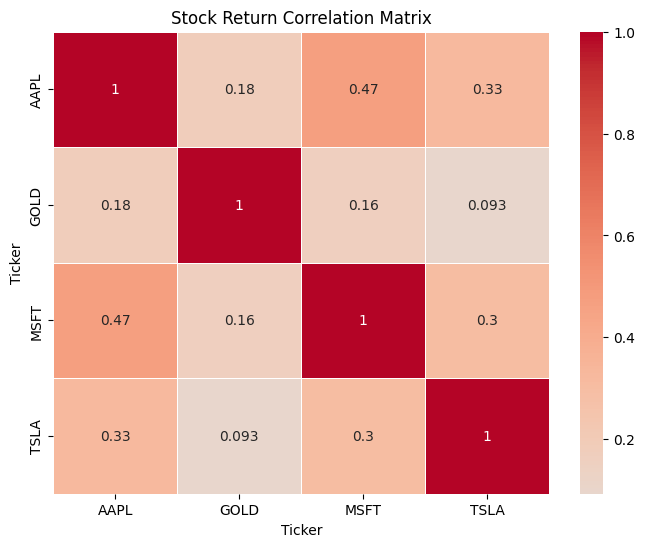

In [24]:
#plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Stock Return Correlation Matrix")
plt.show()